In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Data Preprocessing

In [3]:
data=pd.read_csv("C:/Users/jayaragularumugam/Downloads/patientMonitoring.csv/patientMonitoring.csv")

C:\Users\jayaragularumugam\AppData\Local\Temp\ipykernel_6216\1979365435.py:1: DtypeWarning: Columns (26,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("C:/Users/jayaragularumugam/Downloads/patientMonitoring.csv/patientMonitoring.csv")


In [4]:
data.head()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
0,0.000000,0.000000,105,10.5.126.141,10.5.126.56,35161,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
1,0.000249,0.000249,105,10.5.126.143,10.5.126.56,34237,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
2,0.000037,0.000286,105,10.5.126.145,10.5.126.56,46623,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
3,0.000034,0.000320,105,10.5.126.147,10.5.126.56,45663,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0
4,0.000017,0.000337,105,10.5.126.141,10.5.126.56,38901,1883,0x00000018,0.0,37,...,0.0,0.0,0,0.0,4.0,0.0,6,64,patientMonitoring,0


In [5]:
data.tail()

,frame.time_delta,frame.time_relative,frame.len,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.flags,tcp.time_delta,tcp.len,...,mqtt.qos,mqtt.retain,mqtt.topic,mqtt.topic_len,mqtt.ver,mqtt.willmsg_len,ip.proto,ip.ttl,class,label
76805,0.000196,6611.037621,78,10.5.126.165,10.5.126.56,44993,1883,0x00000018,1.989358,10,...,0.0,0.0,ECG,3.0,0.0,0.0,6,64,patientMonitoring,0
76806,0.000172,6611.037793,77,10.5.126.147,10.5.126.56,38323,1883,0x00000018,1.989338,9,...,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0
76807,0.000126,6611.037919,77,10.5.126.147,10.5.126.56,41889,1883,0x00000018,1.989337,9,...,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0
76808,0.000146,6611.038065,77,10.5.126.167,10.5.126.56,35965,1883,0x00000018,1.989211,9,...,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0
76809,0.000147,6611.038212,77,10.5.126.167,10.5.126.56,33251,1883,0x00000018,1.989194,9,...,0.0,0.0,EMG,3.0,0.0,0.0,6,64,patientMonitoring,0


In [6]:
data.isnull().sum()

frame.time_delta         0
frame.time_relative      0
frame.len                0
ip.src                   0
ip.dst                   0
tcp.srcport              0
tcp.dstport              0
tcp.flags                0
tcp.time_delta           0
tcp.len                  0
tcp.ack                  0
tcp.connection.fin       0
tcp.connection.rst       0
tcp.connection.sack      0
tcp.connection.syn       0
tcp.flags.ack            0
tcp.flags.fin            0
tcp.flags.push           0
tcp.flags.reset          0
tcp.flags.syn            0
tcp.flags.urg            0
tcp.hdr_len              0
tcp.payload              0
tcp.pdu.size             0
tcp.window_size_value    0
tcp.checksum             0
mqtt.clientid            0
mqtt.clientid_len        0
mqtt.conack.flags        0
mqtt.conack.val          0
mqtt.conflag.passwd      0
mqtt.conflag.qos         0
mqtt.conflag.reserved    0
mqtt.conflag.retain      0
mqtt.conflag.willflag    0
mqtt.conflags            0
mqtt.dupflag             0
m

In [7]:
data.isna().sum()

frame.time_delta         0
frame.time_relative      0
frame.len                0
ip.src                   0
ip.dst                   0
tcp.srcport              0
tcp.dstport              0
tcp.flags                0
tcp.time_delta           0
tcp.len                  0
tcp.ack                  0
tcp.connection.fin       0
tcp.connection.rst       0
tcp.connection.sack      0
tcp.connection.syn       0
tcp.flags.ack            0
tcp.flags.fin            0
tcp.flags.push           0
tcp.flags.reset          0
tcp.flags.syn            0
tcp.flags.urg            0
tcp.hdr_len              0
tcp.payload              0
tcp.pdu.size             0
tcp.window_size_value    0
tcp.checksum             0
mqtt.clientid            0
mqtt.clientid_len        0
mqtt.conack.flags        0
mqtt.conack.val          0
mqtt.conflag.passwd      0
mqtt.conflag.qos         0
mqtt.conflag.reserved    0
mqtt.conflag.retain      0
mqtt.conflag.willflag    0
mqtt.conflags            0
mqtt.dupflag             0
m

# Dependent and Independent variables

In [8]:
X = data[['frame.time_delta', 'frame.time_relative', 'tcp.len', 'tcp.time_delta',
        'tcp.pdu.size', 'tcp.window_size_value', 'mqtt.msgtype']]

In [9]:
#calculating the throughput values
if 'Throughput' not in data.columns:
    data['Throughput'] = data['tcp.len'] / (data['tcp.time_delta'])

In [10]:
y = data['Throughput']

# Train and Test Data Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Define feature names
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6', 'Feature7']

# Convert the scaled array to a DataFrame For better visualiation of model
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)


In [13]:
# Check for NaN or infinity values
print("NaN values in Throughput:", data['Throughput'].isna().sum())
print("Infinity values in Throughput:", np.isinf(data['Throughput']).sum())

NaN values in Throughput: 0
Infinity values in Throughput: 96


In [14]:
# Remove rows with invalid values
data = data[~data['Throughput'].isna() & ~np.isinf(data['Throughput'])]

In [15]:
# Cap extreme values in Throughput
data['Throughput'] = np.clip(data['Throughput'], a_min=0, a_max=data['Throughput'].quantile(0.99))

# Ridge Regression

In [51]:
X = data[['frame.time_delta', 'frame.time_relative', 'tcp.len', 'tcp.time_delta',
        'tcp.pdu.size', 'tcp.window_size_value', 'mqtt.msgtype']]
y = data['Throughput']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_preds = ridge_model.predict(X_test_scaled)

# Evaluate Model
print("MSE:", mean_squared_error(y_test, ridge_preds))
print("R2 Score:", r2_score(y_test, ridge_preds))


MSE: 77112514.44149344
R2 Score: 0.44854954850028206


In [17]:
import matplotlib.pyplot as plt
import numpy as np


In [18]:
ridge_preds = ridge_model.predict(X_test_scaled)

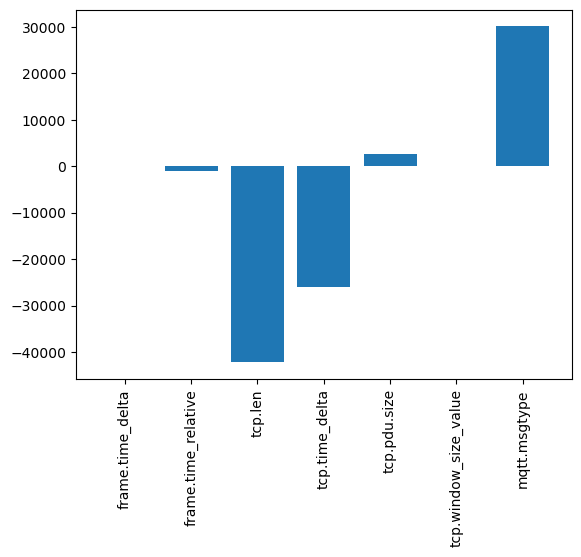

In [88]:
# Plot coefficients
plt.bar(X_train.columns, ridge_model.coef_)
plt.xticks(rotation=90)
plt.show()


# Random Forest Regressor

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
rf_preds = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, rf_preds)
r2_rf = r2_score(y_test, rf_preds)

In [24]:
# Print the metrics
print("Random Forest Regression")
print("Mean Squared Error:", mse_rf)
print("R² Score:", r2_rf)

Random Forest Regression
Mean Squared Error: 2899.790503548777
R² Score: 0.9999792628888576


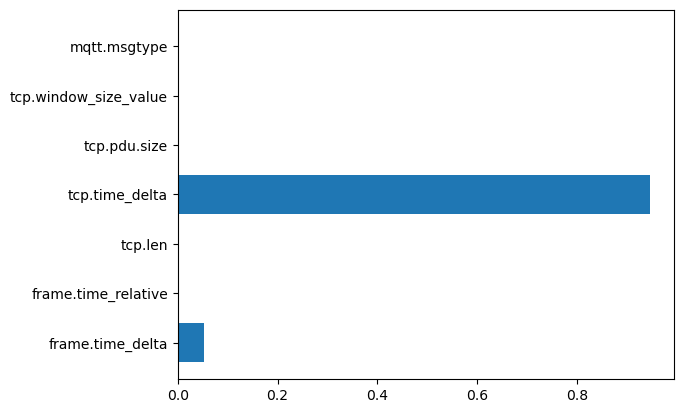

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['frame.time_delta', 'frame.time_relative', 'tcp.len', 'tcp.time_delta',
       'tcp.pdu.size', 'tcp.window_size_value', 'mqtt.msgtype'],
      dtype='object') instead.

In [32]:
from sklearn.tree import plot_tree

# Visualize feature importance
plt.barh(X_train.columns, rf_model.feature_importances_)
plt.show()

# Visualize a single tree
plot_tree(rf_model.estimators_[0], feature_names=X_train.columns, filled=True)
plt.show()


# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predict on the test set
dt_preds = dt_model.predict(X_test_scaled)

# Evaluate the model
mse_dt = mean_squared_error(y_test, dt_preds)
r2_dt = r2_score(y_test, dt_preds)

# Print the metrics
print("Decision Tree Regression")
print("Mean Squared Error:", mse_dt)
print("R² Score:", r2_dt)

Decision Tree Regression
Mean Squared Error: 3920.970556784338
R² Score: 0.9999719601805295


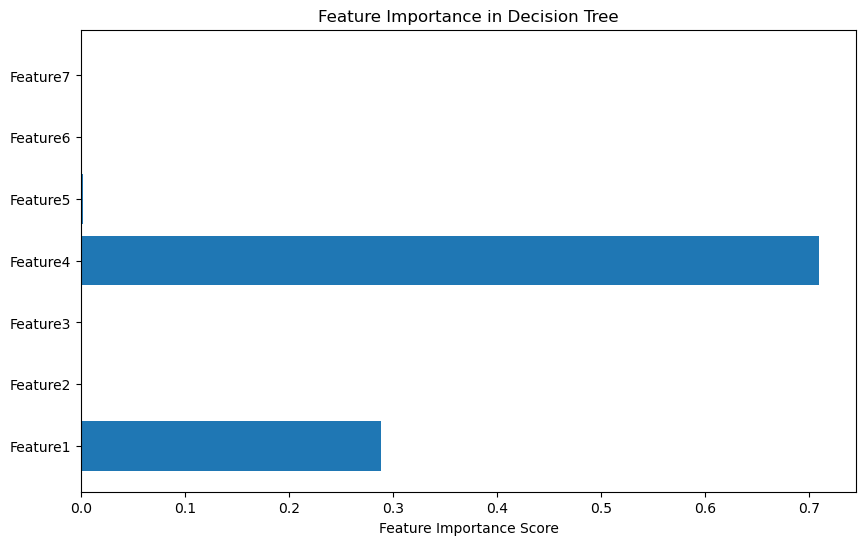

In [46]:
# Feature importance plot using DataFrame
plt.figure(figsize=(10, 6))
plt.barh(X_train_scaled_df.columns, dt_model.feature_importances_)
plt.xlabel("Feature Importance Score")
plt.title("Feature Importance in Decision Tree")
plt.show()

# CNN Model

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

In [56]:
# Build the CNN Model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Summary of the model
cnn_model.summary()


C:\Users\jayaragularumugam\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 6, 64)          │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,657 (57.25 KB)

 Trainable params: 14,657 (57.25 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# Train the model
history = cnn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 119014488.0000 - mae: 3206.0884 - val_loss: 77640248.0000 - val_mae: 2379.1147
Epoch 2/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 74031088.0000 - mae: 2200.1982 - val_loss: 76719880.0000 - val_mae: 2222.1941
Epoch 3/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 75019400.0000 - mae: 2186.6023 - val_loss: 76382456.0000 - val_mae: 2208.5156
Epoch 4/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 74963560.0000 - mae: 2183.0183 - val_loss: 75912472.0000 - val_mae: 2228.9451
Epoch 5/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 71822312.0000 - mae: 2138.9312 - val_loss: 75442672.0000 - val_mae: 2226.6655
Epoch 6/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 72377952.0000 - mae: 2169.9668 - val_loss: 75099640.0000 - val_mae: 2221.5955
Epoch 7/50
1918/1918 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 72444144.0000 - mae: 2182.2297 - val_loss: 74494168.0000 - val_mae: 2221.1333
Epoch 8/50
1918/191

In [58]:
# Predict on the test set
cnn_preds = cnn_model.predict(X_test_scaled)

# Evaluate the model
mse_cnn = mean_squared_error(y_test, cnn_preds)
r2_cnn = r2_score(y_test, cnn_preds)

# Print metrics
print("CNN Regression")
print("Mean Squared Error:", mse_cnn)
print("R² Score:", r2_cnn)

480/480 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
CNN Regression
Mean Squared Error: 48514704.8707134
R² Score: 0.6530594793970987


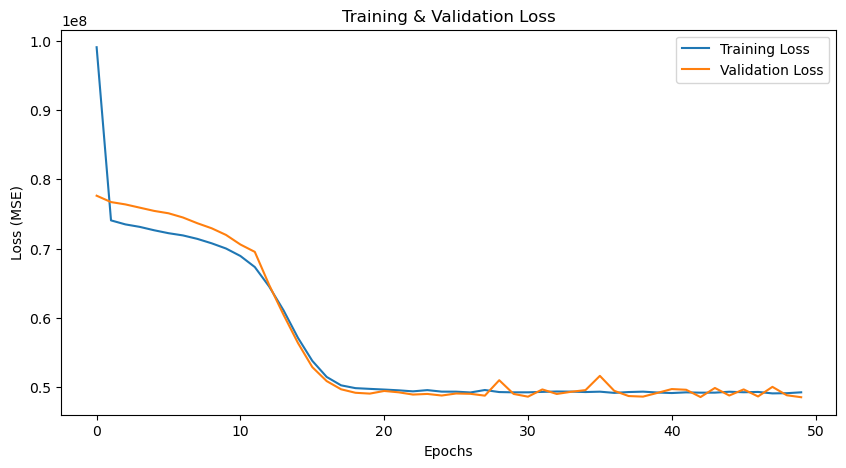

In [60]:
# --- Visualization 1: Training Loss and MAE Curves ---
# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

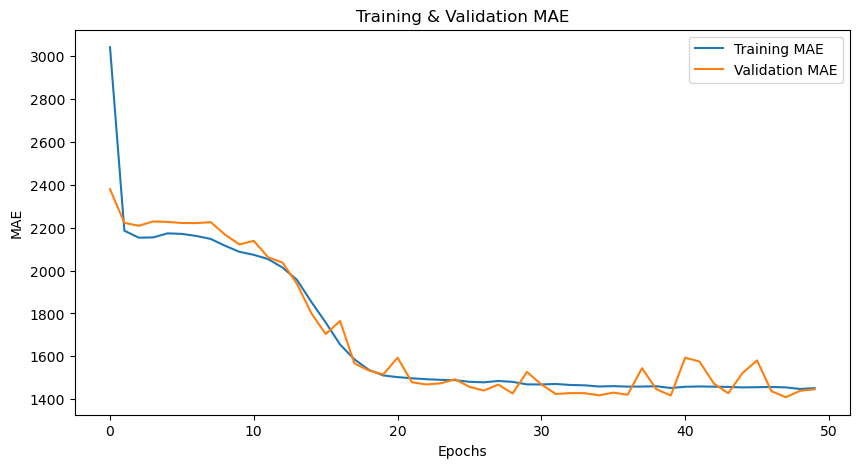

In [61]:
# Plot Training & Validation MAE
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title("Training & Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.legend()
plt.show()


# LSTM Model

In [65]:
from tensorflow.keras.layers import LSTM, Dense

In [66]:
# Create the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(units=1))


C:\Users\jayaragularumugam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


In [68]:
# Train the model
history = lstm_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 144318208.0000 - val_loss: 144058272.0000
Epoch 2/20
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 145247792.0000 - val_loss: 143794960.0000
Epoch 3/20
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 137745584.0000 - val_loss: 143535408.0000
Epoch 4/20
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 141525536.0000 - val_loss: 143287712.0000
Epoch 5/20
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 136605456.0000 - val_loss: 143052448.0000
Epoch 6/20
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 135792320.0000 - val_loss: 142824848.0000
Epoch 7/20
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 125195840.0000 - val_loss: 142604048.0000
Epoch 8/20
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 134696928.0000 - val_loss: 142396112.0000
Epoch 9/20
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 128869496.0000 - val_loss: 142192336.0000
Epoch 10/20
1535/1535 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1

In [69]:
# Evaluate the model
y_pred = lstm_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
R² Score: -0.0145
Mean Squared Error: 141860079.6059


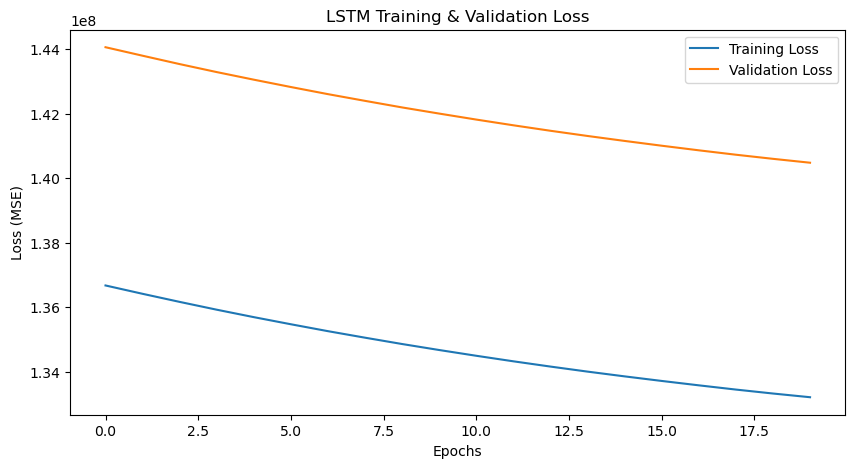

In [71]:
# --- Visualization 1: Training Loss Curves ---
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.show()

# Resource Allocation

In [84]:
# Define thresholds for resource allocation based on throughput predictions
def allocate_resources(throughput):
    if throughput < 1000:
        return "Low Resource Allocation"
    elif 1000 <= throughput < 5000:
        return "Medium Resource Allocation"
    else:
        return "High Resource Allocation"

# Generate predictions using your trained model (use Random Forest in this example)
rf_preds = rf_model.predict(X_test_scaled)

# Create a DataFrame to store predictions and allocated resources
results_df = pd.DataFrame({
    "Throughput Prediction": rf_preds,
    "Resource Allocation": [allocate_resources(tp) for tp in rf_preds]
})

# View allocation results
print(results_df.head(20))

# Save the resource allocation results to a CSV file
results_df.to_csv("resource_allocation_results.csv", index=False)
print("Resource allocation results saved to 'resource_allocation_results.csv'")


    Throughput Prediction       Resource Allocation
0              107.160914   Low Resource Allocation
1            79978.021978  High Resource Allocation
2              107.150856   Low Resource Allocation
3              107.150856   Low Resource Allocation
4              107.160914   Low Resource Allocation
5              107.160914   Low Resource Allocation
6               65.864953   Low Resource Allocation
7              107.160914   Low Resource Allocation
8              107.160914   Low Resource Allocation
9               65.864776   Low Resource Allocation
10             107.150856   Low Resource Allocation
11              65.864776   Low Resource Allocation
12             158.637738   Low Resource Allocation
13              65.864776   Low Resource Allocation
14             107.150856   Low Resource Allocation
15              75.178998   Low Resource Allocation
16           83333.333333  High Resource Allocation
17             107.160914   Low Resource Allocation
18          

C:\Users\jayaragularumugam\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
